# Binary Classification - Keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Create or read the dataset

In [2]:
from sklearn.datasets import make_classification
X,Y = make_classification(n_samples=1000, n_classes=2, n_features=20, n_informative=10)

In [3]:
X

array([[ 0.71384291, -1.22402552,  0.91971175, ..., -1.04929053,
         2.90836239,  2.91990023],
       [ 3.18718535,  0.68741302,  1.2391279 , ..., -2.88710046,
         2.3842489 ,  0.76409842],
       [-0.55754087, -0.93869974,  0.33435612, ...,  2.64719646,
         1.40172895, -0.44909151],
       ...,
       [-2.36301784, -0.2293605 , -2.11247268, ...,  1.0818592 ,
         0.65302198,  3.1915489 ],
       [-1.06207653,  0.25745756,  0.26093784, ...,  3.84446629,
         0.08025679,  0.41122019],
       [-1.72653889, -1.67744568, -0.9034487 , ..., -1.81817034,
        -0.12275714,  1.98215998]])

In [4]:
Y

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,

In [5]:
# Column names
cols = [f'x{i+1}' for i in range(20)]
cols

['x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x18',
 'x19',
 'x20']

In [6]:
import pandas as pd
X = pd.DataFrame(X, columns=cols)
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.713843,-1.224026,0.919712,1.226422,-4.312107,0.486748,0.315220,-4.330357,0.265859,0.444015,-0.267531,-0.979278,-0.043608,-0.535070,2.153996,0.687066,-0.640702,-1.049291,2.908362,2.919900
1,3.187185,0.687413,1.239128,1.248686,-1.032219,1.722536,3.271949,2.320368,-0.709161,-2.148010,0.477104,-1.672038,0.118117,0.518899,-2.546428,-1.425714,0.198713,-2.887100,2.384249,0.764098
2,-0.557541,-0.938700,0.334356,-0.847481,1.151543,2.076669,2.673467,2.272045,0.356371,-0.468598,-1.482950,4.639648,0.961073,-1.731478,2.883761,0.838195,0.714922,2.647196,1.401729,-0.449092
3,-6.143663,0.940049,0.259209,-0.385700,5.170773,-6.300740,3.973362,2.014359,0.438005,-4.382779,1.358949,1.128521,0.429640,0.827856,0.359261,1.259146,0.589371,3.410832,1.050031,1.566551
4,-0.317514,-0.860781,-1.446913,0.315193,0.557118,3.150779,1.717507,3.703954,-1.667564,1.442676,-0.395688,8.289672,0.944826,0.391868,-0.579736,-3.268321,0.035380,2.337003,1.172553,-3.059630


In [7]:
Y = pd.DataFrame(Y,columns=['y'])

In [8]:
Y.head()

,y
0,0
1,0
2,1
3,1
4,1


## Preprocess the data

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [10]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [11]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[ 0.30382572, -1.26724763,  0.8836348 , ..., -0.52800608,
         1.11549757,  1.22752951],
       [ 1.41384472,  0.75310282,  1.19478177, ..., -1.48114991,
         0.80521066,  0.14060925],
       [-0.26676254, -0.96566426,  0.31343311, ...,  1.38910389,
         0.22353688, -0.4710614 ],
       ...,
       [-1.07704814, -0.21590756, -2.0700511 , ...,  0.57727264,
        -0.21971439,  1.36449036],
       [-0.49319466,  0.29864892,  0.24191552, ...,  2.01004425,
        -0.55880419, -0.03730622],
       [-0.79140078, -1.74650324, -0.89232687, ..., -0.92677041,
        -0.67899297,  0.75473611]])

In [12]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.303826,-1.267248,0.883635,1.193871,-2.041018,-0.059090,-0.366828,-1.328915,0.294494,0.186019,-0.230038,-0.743742,-0.071110,-0.528673,0.878473,0.638399,-0.630625,-0.528006,1.115498,1.227530
1,1.413845,0.753103,1.194782,1.215764,-0.496799,0.519714,1.323863,0.556437,-0.702146,-1.088640,0.502601,-0.949585,0.091070,0.497113,-1.603759,-0.489615,0.197290,-1.481150,0.805211,0.140609
2,-0.266763,-0.965664,0.313433,-0.845470,0.531348,0.685579,0.981644,0.542738,0.387013,-0.262769,-1.425876,0.925835,0.936400,-1.693090,1.263853,0.719087,0.706428,1.389104,0.223537,-0.471061
3,-2.773775,1.020134,0.240231,-0.391384,2.423659,-3.238134,1.724939,0.469689,0.470456,-2.187615,1.370239,-0.117443,0.403471,0.797808,-0.069303,0.943833,0.582597,1.785148,0.015324,0.545193
4,-0.159040,-0.883306,-1.421722,0.297828,0.251484,1.188658,0.435015,0.948657,-1.681799,0.677123,-0.356130,2.010383,0.920106,0.373479,-0.565175,-1.473385,0.036194,1.228228,0.087859,-1.787253


## Train Test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=57)

In [14]:
xtrain.shape

(800, 20)

In [15]:
xtest.shape

(200, 20)

## Create a neural network without dropout layer

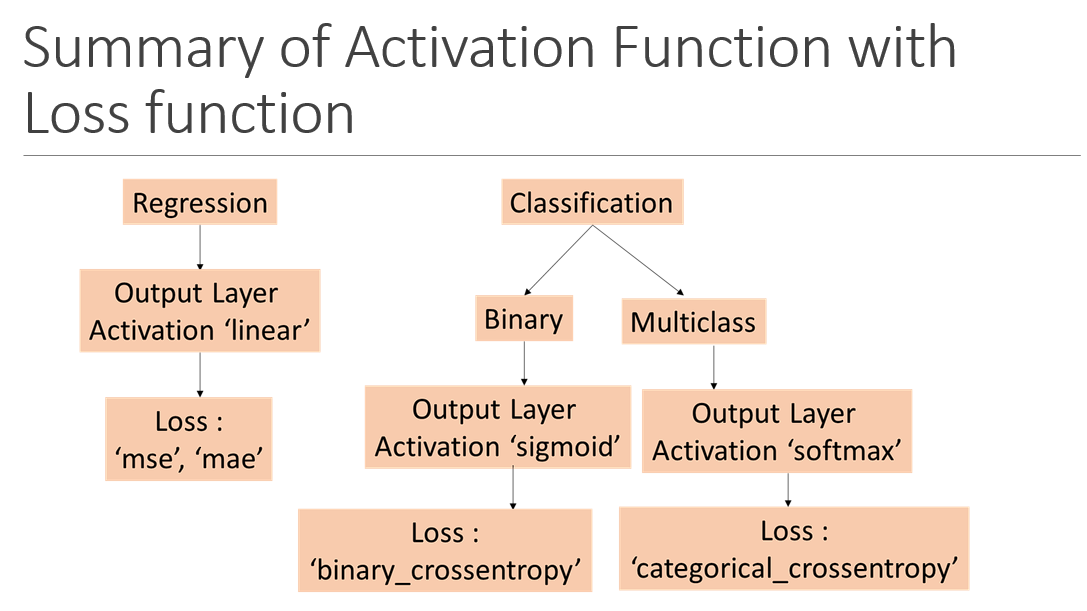

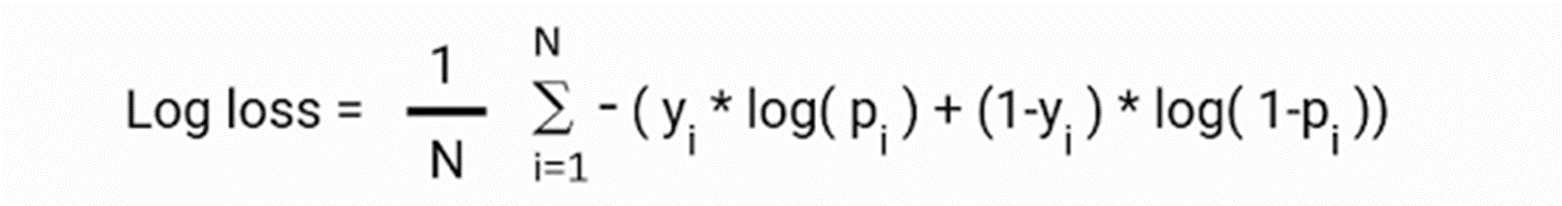

In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model1 = Sequential()
model1.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1344      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile neural network

In [19]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fitting the neural network

In [20]:
hist = model1.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


20/20 [==============================] - 1s 12ms/step - loss: 0.6126 - accuracy: 0.6687 - val_loss: 0.5555 - val_accuracy: 0.7312
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4891 - accuracy: 0.8078 - val_loss: 0.4705 - val_accuracy: 0.8000
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8422 - val_loss: 0.4089 - val_accuracy: 0.8313
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.8672 - val_loss: 0.3654 - val_accuracy: 0.8500
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3057 - accuracy: 0.8859 - val_loss: 0.3299 - val_accuracy: 0.8750
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8984 - val_loss: 0.3053 - val_accuracy: 0.9062
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.9031 - val_loss: 0.2826 - val_accuracy: 0.9000
Epoch 8/100
20/20 [=====

### Learning curve plotting

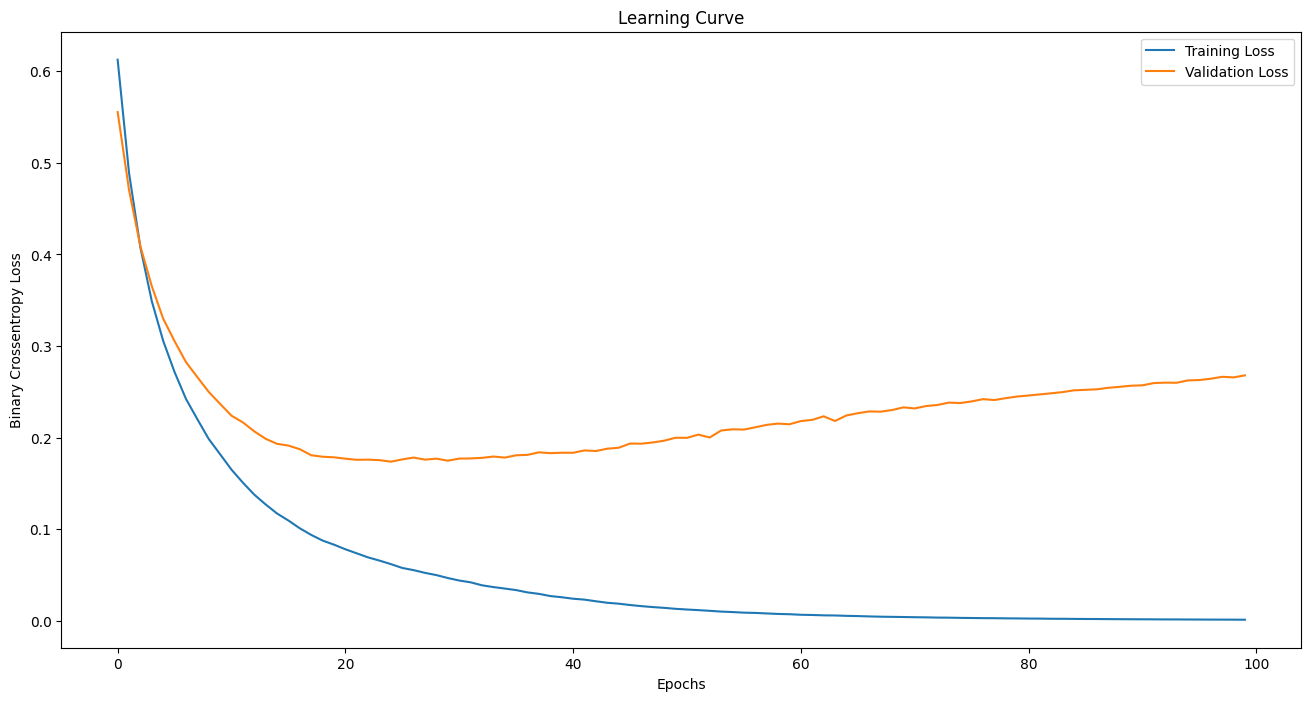

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [32]:
model1.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 887us/step - loss: 0.0546 - accuracy: 0.9925


[0.05457280948758125, 0.9925000071525574]

In [33]:
model1.evaluate(xtest,ytest)

7/7 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.9400


[0.2819758951663971, 0.9399999976158142]

### Creating model with Dropout : To reduce overfit

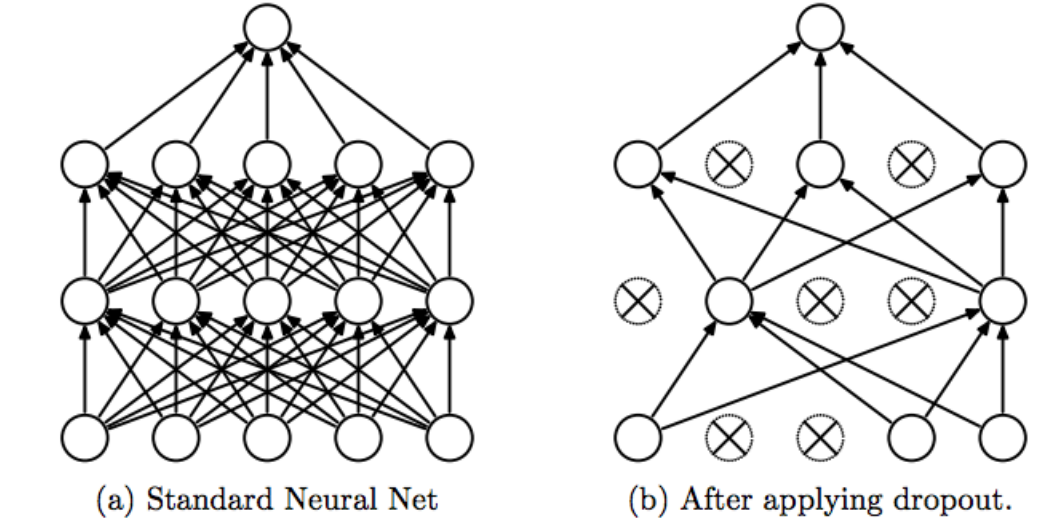

In [22]:
from keras.layers import Dropout

In [23]:
model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(64,activation='relu',input_dim=xtrain.shape[1]))

# Dropout Layer 1
model2.add(Dropout(0.3))

# Hidden Layer 2
model2.add(Dense(32,activation='relu'))

# Dropout Layer 2
model2.add(Dropout(0.2))

# Output Layer
model2.add(Dense(1,activation='sigmoid'))

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1344      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compile the model
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
# Fit the model
hist2 = model2.fit(xtrain,ytrain, validation_split=0.2, epochs=100)

Epoch 1/100


20/20 [==============================] - 1s 7ms/step - loss: 0.6612 - accuracy: 0.6453 - val_loss: 0.6023 - val_accuracy: 0.7312
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5810 - accuracy: 0.7078 - val_loss: 0.5221 - val_accuracy: 0.8062
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5110 - accuracy: 0.7750 - val_loss: 0.4592 - val_accuracy: 0.8313
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8062 - val_loss: 0.4070 - val_accuracy: 0.8562
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4344 - accuracy: 0.8000 - val_loss: 0.3687 - val_accuracy: 0.8562
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8266 - val_loss: 0.3339 - val_accuracy: 0.8813
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8313 - val_loss: 0.3097 - val_accuracy: 0.8813
Epoch 8/100
20/20 [======

### Plot the learning curve

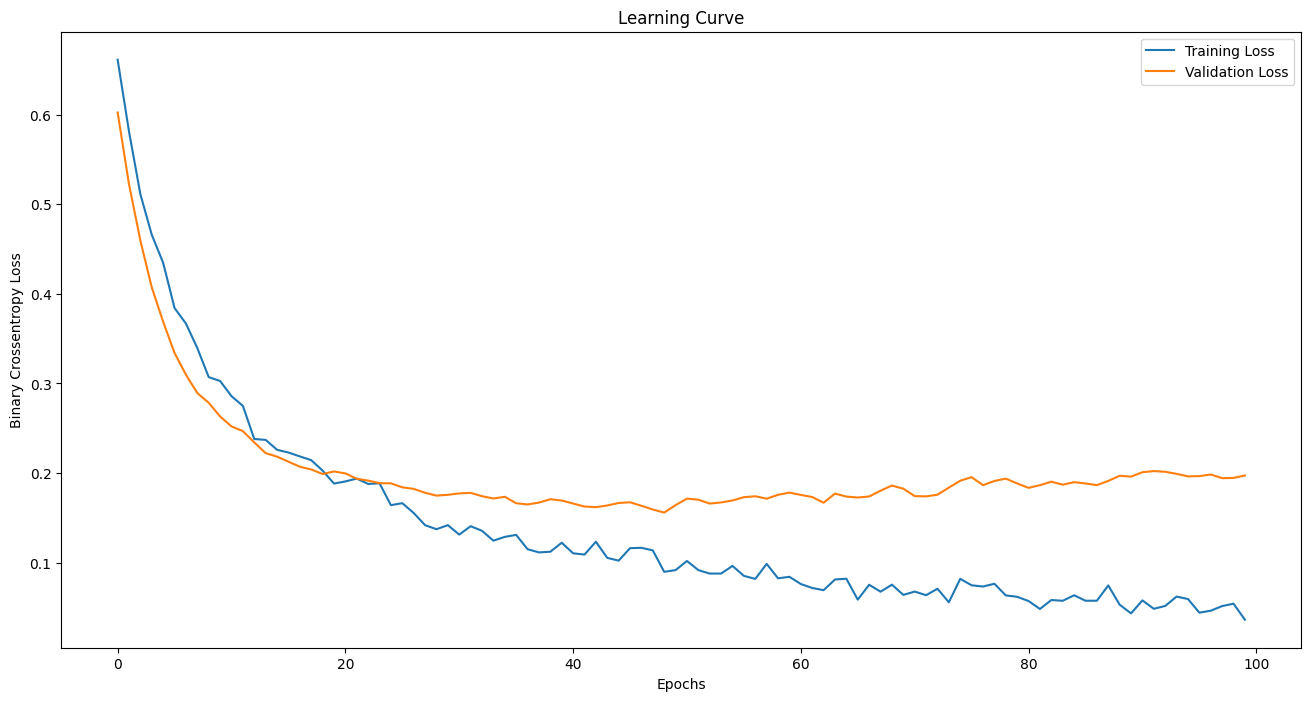

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist2.history['loss'],label='Training Loss')
plt.plot(hist2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Binary Crossentropy Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Evaluate the model

In [30]:
# Training Accuracy
model2.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 825us/step - loss: 0.0537 - accuracy: 0.9850


[0.05370517075061798, 0.9850000143051147]

In [31]:
# Testing Accuracy
model2.evaluate(xtest,ytest)

7/7 [==============================] - 0s 1ms/step - loss: 0.1426 - accuracy: 0.9550


[0.1425522267818451, 0.9549999833106995]

### Predict train and test data

In [35]:
yprob_tr = model2.predict(xtrain)
yprob_ts = model2.predict(xtest)

7/7 [==============================] - 0s 894us/step


In [36]:
yprob_tr[0:5]

array([[0.95489144],
       [0.99794203],
       [0.99999994],
       [1.        ],
       [0.98333544]], dtype=float32)

In [37]:
yprob_ts[0:5]

array([[0.10337111],
       [0.9393058 ],
       [0.9999345 ],
       [0.9999988 ],
       [0.02584476]], dtype=float32)

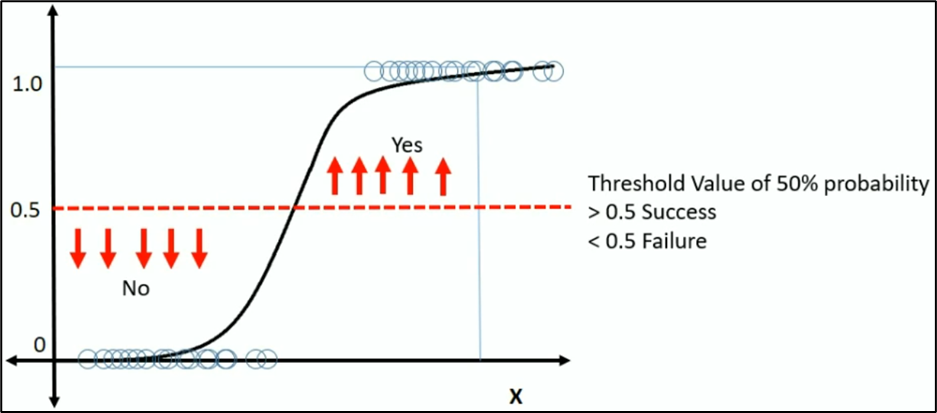

In [38]:
# Predictions for testing
thr = 0.5
ypred_ts = []
for i in yprob_ts:
    if i>=thr:
        ypred_ts.append(1)
    else:
        ypred_ts.append(0)

In [39]:
ypred_ts[0:5]

[0, 1, 1, 1, 0]

In [40]:
ytest.head()

,y
775,1
340,1
95,1
513,1
319,0


In [41]:
# Training preds
ypred_tr = []
for i in yprob_tr:
    if i>=0.5:
        ypred_tr.append(1)
    else:
        ypred_tr.append(0)

In [42]:
ypred_tr[0:5]

[1, 1, 1, 1, 1]

In [43]:
ytrain.head()

,y
452,1
444,1
141,1
442,1
193,1


## Confusion matrix

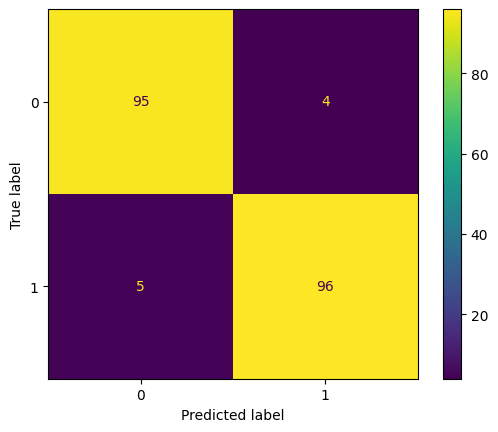

In [44]:
# Plot the confusion Matrix for testing data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=[0,1])
cfd.plot()

### Classification report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        99
           1       0.96      0.95      0.96       101

    accuracy                           0.95       200
   macro avg       0.95      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



### Plot roc-auc curve

In [48]:
from sklearn.metrics import roc_auc_score
roc = roc_auc_score(ytest, yprob_ts)
roc

0.9914991499149914

In [49]:
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(ytest, yprob_ts)

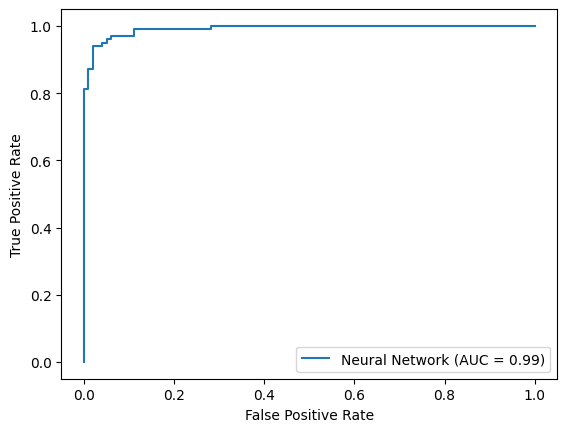

In [53]:
from sklearn.metrics import RocCurveDisplay
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc ,estimator_name='Neural Network')
roc_display.plot()